<a href="https://colab.research.google.com/github/TheoKoess/Financement/blob/maxime-garnier/Projet_Moreau_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting & dataviz

# Ceci est un test
# Ceci est le test deucième du nom 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
financement_df = pd.read_csv("/content/drive/MyDrive/financement.csv", sep=";")

## Préparation des données


In [6]:
# Conversion de la variable 'lancement' en type datetime puis on garde juste la date
financement_df["lancement"] = pd.to_datetime(financement_df["lancement"])

# Conversion de la variable 'date_butoire' en date
financement_df["date_butoire"] = pd.to_datetime(financement_df["date_butoire"])

<ipython-input-6-537a18c9089a>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  financement_df["date_butoire"] = pd.to_datetime(financement_df["date_butoire"])


In [7]:
financement_df["day_lancement"] = financement_df["lancement"].dt.day.astype(int)
financement_df["month_lancement"] = financement_df["lancement"].dt.month.astype(int)
financement_df["year_lancement"] = financement_df["lancement"].dt.year.astype(int)

financement_df["day_date_butoire"] = financement_df["date_butoire"].dt.day.astype(int)
financement_df["month_date_butoire"] = financement_df["date_butoire"].dt.month.astype(int)
financement_df["year_date_butoire"] = financement_df["date_butoire"].dt.year.astype(int)

financement_df['ecart'] = (financement_df['date_butoire'] - financement_df['lancement']) / np.timedelta64(1, 'D')

In [10]:
def resume_table(df):
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index()
    summary["name"] = summary["index"]
    summary = summary[["name", "dtypes"]] # Correction : les colonnes doivent être spécifiées entre crochets
    summary["Missing"] = df.isnull().sum().values
    summary["Miss_percent"] = round((summary["Missing"] / len(df))*100, 2) # Correction : le calcul du pourcentage de valeurs manquantes doit être corrigé
    summary["Uniques"] = df.nunique().values
    summary["First Value"] = df.iloc[0].values
    summary["Second value"] = df.iloc[1].values
    summary["Third value"] = df.iloc[2].values
    return summary

In [11]:
resume_table(financement_df)

Format de la base : (373995, 22)


,name,dtypes,Missing,Miss_percent,Uniques,First Value,Second value,Third value
0,ID,int64,0,0.0,373995,1000002330,1000003930,1000004038
1,nom,object,0,0.0,371167,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
2,categorie,object,0,0.0,159,Poetry,Narrative Film,Narrative Film
3,categorie_principale,object,0,0.0,15,Publishing,Film & Video,Film & Video
4,monaie,object,0,0.0,14,GBP,USD,USD
5,date_butoire,datetime64[ns],0,0.0,3164,2015-09-10 00:00:00,2017-01-11 00:00:00,2013-02-26 00:00:00
6,objectif,float64,0,0.0,8292,1000.0,30000.0,45000.0
7,lancement,datetime64[ns],0,0.0,343189,2015-11-08 12:12:00,2017-02-09 04:43:00,2013-12-01 00:20:00
8,promesse,float64,0,0.0,61878,0.0,2421.0,220.0
9,etat,object,0,0.0,5,failed,failed,failed


Feature engineering

In [13]:
financement_df['etat'] = financement_df['etat'].replace("successful",1)
financement_df['etat'] = financement_df['etat'].replace("live",1)
financement_df['etat'] = financement_df['etat'].replace("failed",0)
financement_df['etat'] = financement_df['etat'].replace("canceled",0)
financement_df['etat'] = financement_df['etat'].replace("suspended",0)
financement_df['etat'] = financement_df['etat'].astype(int)


In [14]:
financement_df_dum = pd.get_dummies(financement_df, columns=['categorie_principale', 'monaie', 'pays'])
financement_df_quant = financement_df.select_dtypes(include=['float64'])

col_financement_df = list(financement_df.columns)
remove_col = ['categorie_principale', 'monaie', 'pays']
list_col_to_remove = [x for x in col_financement_df if x not in remove_col]
financement_df_dum = financement_df_dum.drop(list_col_to_remove, axis= 1)

data = pd.concat([financement_df_dum, financement_df_quant], axis = 1)

<ipython-input-27-a32c622396c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = financement_df.corr(method='pearson')


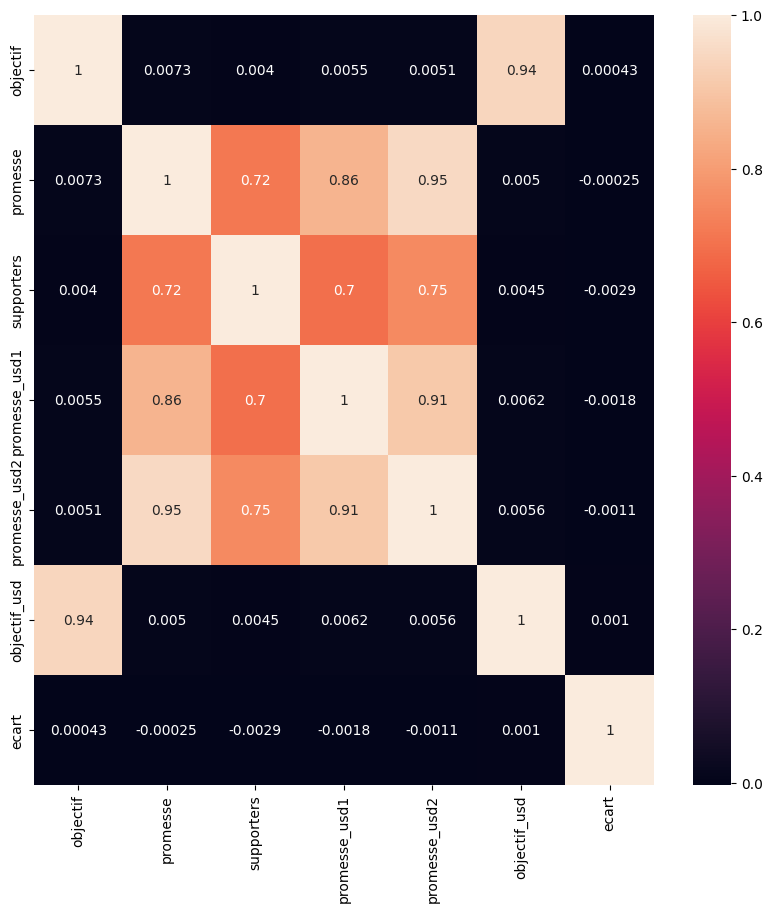

In [27]:
corr_df = financement_df.corr(method='pearson')
corr2_df = financement_df_quant.corr(method='pearson')
corr3_df = financement_df_dum.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(corr2_df, annot=True)
plt.show()

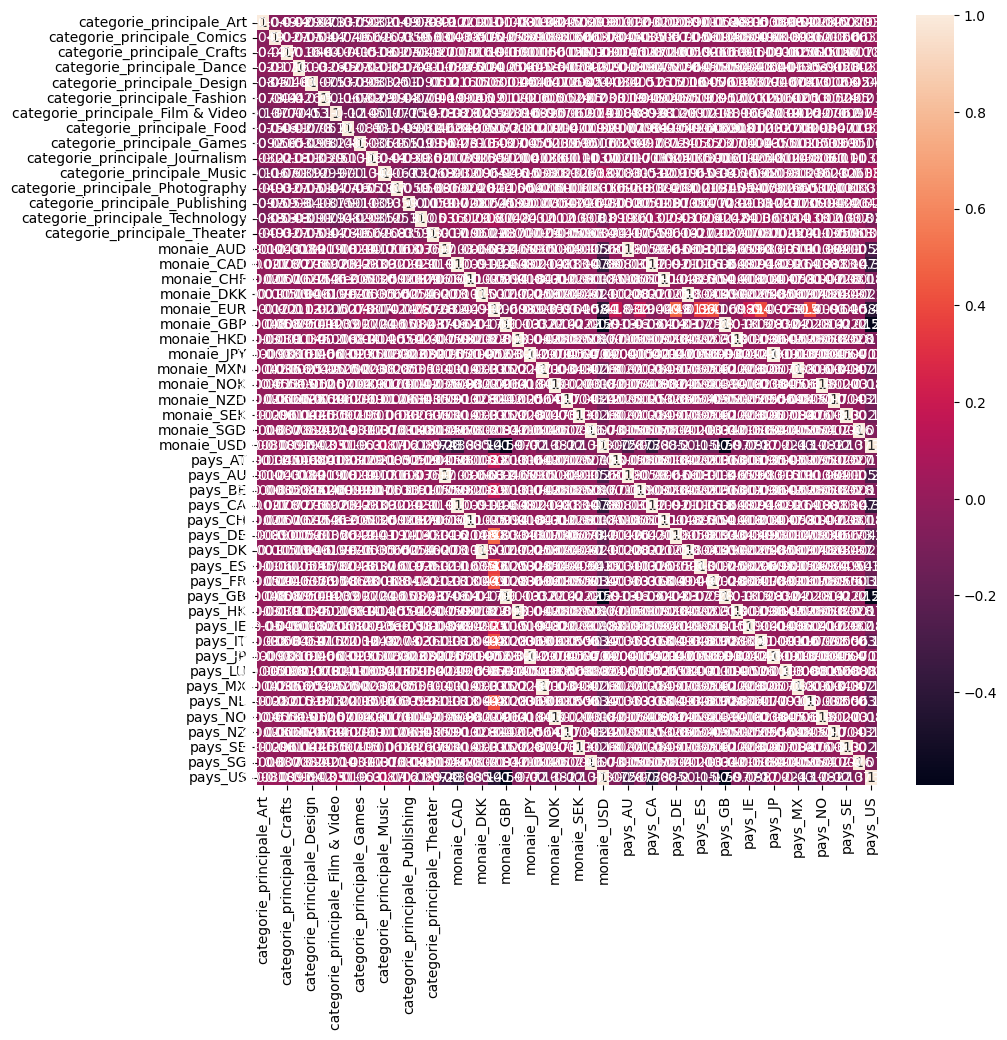

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr3_df, annot=True)
plt.show()

In [31]:
corr_etat = corr_df["etat"].sort_values(ascending=False)

# Créer un dataframe avec les variables les plus corrélées avec y
df_corr_etat = pd.DataFrame({'Variable':corr_etat.index, 'Corrélation':corr_etat.values})

# Afficher les 7 variables les plus corrélées avec y
print(df_corr_etat.head(20))

              Variable  Corrélation
0                 etat     1.000000
1           supporters     0.127451
2             promesse     0.110727
3        promesse_usd2     0.109467
4        promesse_usd1     0.096202
5                   ID    -0.000771
6                ecart    -0.006895
7      month_lancement    -0.008713
8        day_lancement    -0.010749
9     day_date_butoire    -0.019852
10  month_date_butoire    -0.021990
11        objectif_usd    -0.023044
12            objectif    -0.024204
13   year_date_butoire    -0.066922
14      year_lancement    -0.067552
